In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
%matplotlib inline
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
os.listdir('./data')

['gender_submission.csv', 'test.csv', 'train.csv']

In [3]:
df_test = pd.read_csv('./data/test.csv')
df_train = pd.read_csv('./data/train.csv')
df_submission = pd.read_csv('./data/gender_submission.csv')

In [4]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
df_test.shape, df_train.shape, df_submission.shape

((418, 11), (891, 12), (418, 2))

In [6]:
df = df_train.set_index('PassengerId')

In [7]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [8]:
cond = (df.Age >= 22.0) & (df.Age <= 35.0)
df.loc[cond, :]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [9]:
df.loc[4, 'Name'] # uses the index

'Futrelle, Mrs. Jacques Heath (Lily May Peel)'

In [10]:
df.iloc[4, :] # uses the location DataFrame --> Series

Survived                           0
Pclass                             3
Name        Allen, Mr. William Henry
Sex                             male
Age                               35
SibSp                              0
Parch                              0
Ticket                        373450
Fare                            8.05
Cabin                            NaN
Embarked                           S
Name: 5, dtype: object

In [11]:
type(df.iloc[4, 2])

str

In [12]:
pd.isnull(np.nan)

True

In [13]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [14]:
df.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
E101           3
              ..
B86            1
C86            1
E38            1
D7             1
A20            1
Name: Cabin, Length: 147, dtype: int64

In [15]:
def plot_box_num(df, col):
    age_notnan = df[col][~df.Age.isnull()]
    age_survived = df[col][(df.Survived==1) & ~df[col].isnull()]
    age_notsurvived = df[col][(df.Survived==0) & ~df[col].isnull()]
    plt.boxplot([age_notnan, age_survived, age_notsurvived])

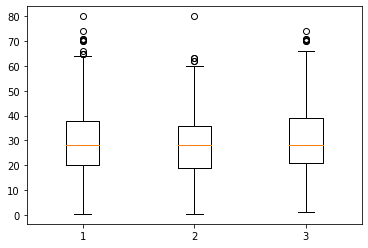

In [16]:
plot_box_num(df, 'Age')

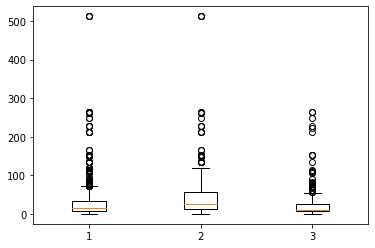

In [17]:
plot_box_num(df, 'Fare')

In [18]:
df[df.Age > 75]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [19]:
df[df.Fare > 200].sort_values('Fare')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S
731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C
701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C


In [20]:
ticket_p = df.groupby('Ticket', as_index=False).agg({'Survived': 'count'}).rename(columns={'Survived':'t_count'}).sort_values('t_count', ascending=False)
ticket_p

,Ticket,t_count
80,1601,7
568,CA. 2343,7
333,347082,7
566,CA 2144,6
337,347088,6
...,...,...
300,345572,1
299,345364,1
298,343276,1
297,343275,1


In [21]:
df_merge = df.merge(ticket_p, on='Ticket')
df_merge['Fare_per_person'] = df_merge.Fare/df_merge.t_count

In [22]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [23]:
df_merge.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,t_count,Fare_per_person
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.038247,0.254824
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.002633,-0.655559
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.253507,0.227631
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.661622,-0.012298
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.593076,0.060240
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.345541,0.839037
t_count,0.038247,-0.002633,-0.253507,0.661622,0.593076,0.345541,1.000000,0.013853
Fare_per_person,0.254824,-0.655559,0.227631,-0.012298,0.060240,0.839037,0.013853,1.000000


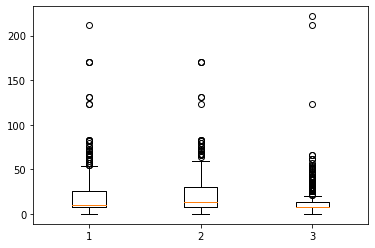

In [24]:
plot_box_num(df_merge, 'Fare_per_person')

In [25]:
df_merge[df_merge.Fare_per_person > 100].sort_values('Fare')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,t_count,Fare_per_person
489,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C,1,211.5000
630,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,1,221.7792
195,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,2,123.7604
196,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,2,123.7604
432,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,2,131.1875
433,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,2,131.1875
357,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3,170.7764
358,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,170.7764
359,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3,170.7764


(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

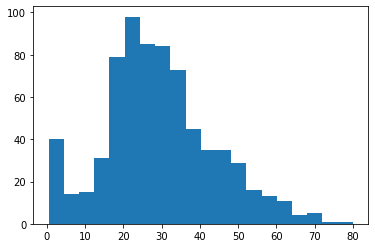

In [26]:
plt.hist(df_merge.Age, bins=20)

In [27]:
cond = df_merge.Age.isnull()
sub_value = df_merge.Age.mean()
df_merge.Age = np.where(cond, sub_value, df_merge.Age)

(array([ 40.,  14.,  15.,  31.,  79.,  98.,  85., 261.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

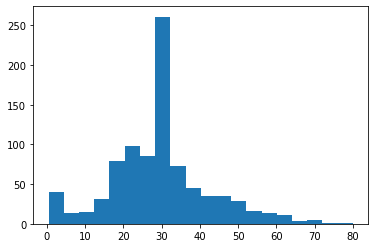

In [28]:
plt.hist(df_merge.Age, bins=20)

In [29]:
cond = (df_merge.Sex == 'female')
sub_value = 1
df_merge.Sex = np.where(cond, sub_value, 0)

In [30]:
df_merge.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,t_count,Fare_per_person
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.038247,0.254824
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,-0.002633,-0.655559
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.154748,0.128809
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.221281,0.205349
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,0.661622,-0.012298
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,0.593076,0.060240
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.345541,0.839037
t_count,0.038247,-0.002633,0.154748,-0.221281,0.661622,0.593076,0.345541,1.000000,0.013853
Fare_per_person,0.254824,-0.655559,0.128809,0.205349,-0.012298,0.060240,0.839037,0.013853,1.000000


In [31]:
df_merge.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
cond = df_merge.Embarked.isnull()
sub_value = 'S'
df_merge.Embarked = np.where(cond, 'S', df_merge.Embarked)

In [33]:
df_merge = df_merge.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df_merge.isnull().sum()

Survived           0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
t_count            0
Fare_per_person    0
dtype: int64

In [34]:
df_merge.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,t_count,Fare_per_person
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.038247,0.254824
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,-0.002633,-0.655559
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.154748,0.128809
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.221281,0.205349
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,0.661622,-0.012298
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,0.593076,0.060240
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.345541,0.839037
t_count,0.038247,-0.002633,0.154748,-0.221281,0.661622,0.593076,0.345541,1.000000,0.013853
Fare_per_person,0.254824,-0.655559,0.128809,0.205349,-0.012298,0.060240,0.839037,0.013853,1.000000


In [35]:
df_survived = df[df.Survived == 1]
df_notsurvived = df[df.Survived == 0]

In [36]:
df.Pclass.value_counts()/len(df)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [37]:
df_survived.Pclass.value_counts()/len(df_survived)

1    0.397661
3    0.347953
2    0.254386
Name: Pclass, dtype: float64

In [38]:
df_notsurvived.Pclass.value_counts()/len(df_notsurvived)

3    0.677596
2    0.176685
1    0.145719
Name: Pclass, dtype: float64

In [39]:
# hw:
# read about "joining/merging" of pandas
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
# review set theory: union, intersect
# Table 1:
# key value_1
# a    1
# b    2
# Table 2:
# key value_2
# a    3
# a    4
# Result Table (INNER JOIN):
# key v_1  v_2
# a   1     3
# a   1     4
# OUT JOIN, INNER JOIN

In [40]:
df_merge

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,t_count,Fare_per_person
0,0,3,0,22.0,1,0,7.2500,S,1,7.2500
1,1,1,1,38.0,1,0,71.2833,C,1,71.2833
2,1,3,1,26.0,0,0,7.9250,S,1,7.9250
3,1,1,1,35.0,1,0,53.1000,S,2,26.5500
4,0,1,0,37.0,1,0,53.1000,S,2,26.5500
...,...,...,...,...,...,...,...,...,...,...
886,0,3,0,25.0,0,0,7.0500,S,1,7.0500
887,0,2,0,27.0,0,0,13.0000,S,1,13.0000
888,1,1,1,19.0,0,0,30.0000,S,1,30.0000
889,1,1,0,26.0,0,0,30.0000,C,1,30.0000


In [41]:
# ['Germany', 'India', 'USA']
# 0, 1, 2 --> sprurious numerical relation between the 3 countries
# 00, 01, 10, 11 --> proper encoding
ohe = OneHotEncoder()
X_cat = ohe.fit_transform(df_merge.Embarked.values.reshape(-1,1)).toarray()

In [42]:
X_short = df_merge.drop(['Survived', 'Embarked'], axis=1).values

In [43]:
X = np.hstack([X_cat, X_short])
X.shape

(891, 11)

In [44]:
y = df_merge.Survived.values

In [45]:
lr=LinearRegression()
lr.fit(X,y)
y_prediction=lr.predict(X)

In [46]:
print(y_prediction)
y

[ 9.82321424e-02  9.04049889e-01  6.16236005e-01  8.83166298e-01
  3.67750040e-01  5.98440094e-02  1.54292871e-01  2.85750896e-01
  1.12453560e-01  5.81101392e-01  6.10331658e-01  5.34246379e-01
  5.74736706e-01  7.01430055e-01  1.80167743e-01  8.92301256e-01
  2.80425119e-01  6.91206854e-01  5.99589825e-01  7.76897203e-01
  1.47534808e-01 -9.65225519e-02  5.47593464e-01  5.06671091e-01
  4.94978985e-01  4.07201600e-01  5.24209251e-01  3.21772057e-02
  6.86418869e-01  6.21096223e-01  1.34443339e-01  1.22751232e-01
  1.05213073e-01  9.93670196e-02  5.23079662e-01  2.66563132e-01
  5.44752443e-01  6.62190787e-01  2.35938191e-01  3.47013202e-01
  2.41419944e-01  7.44132037e-01  4.44733730e-01  4.35295311e-01
  2.51945975e-02  5.52302962e-01  6.02709169e-02  1.58466635e-01
  4.56129446e-01  9.36469385e-01  9.30623332e-01  2.43665121e-01
  6.58264251e-01  9.08990806e-02  4.45183352e-01  9.93891406e-01
  8.66395035e-01  6.58319409e-01  5.54135368e-02  4.91521363e-01
  9.85312382e-01  3.38373

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,

In [47]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
sigmoid(10)

0.9999546021312976

In [48]:
result=sigmoid(y_prediction)

In [49]:
result

array([0.52453831, 0.71178104, 0.649362  , 0.70747793, 0.5909152 ,
       0.51495654, 0.53849688, 0.57095557, 0.5280838 , 0.6413208 ,
       0.64801645, 0.63047297, 0.63985543, 0.66850476, 0.54492049,
       0.70936484, 0.56965044, 0.66623534, 0.64556246, 0.68501101,
       0.53681694, 0.47588808, 0.63357708, 0.62402578, 0.62127865,
       0.60041669, 0.6281315 , 0.50804361, 0.66516981, 0.65046783,
       0.5335603 , 0.53064933, 0.52627903, 0.52482133, 0.62786761,
       0.56624897, 0.63291726, 0.65975235, 0.55871244, 0.5858931 ,
       0.56006354, 0.67789876, 0.6093864 , 0.60713743, 0.50629832,
       0.63466973, 0.51506317, 0.53953396, 0.61209557, 0.71838594,
       0.71720173, 0.56061666, 0.65887037, 0.52270914, 0.60949342,
       0.72985586, 0.70399503, 0.65888277, 0.51384984, 0.62046476,
       0.72816104, 0.58379528, 0.70744758, 0.53953352, 0.53536305,
       0.64204047, 0.52303352, 0.67083142, 0.55475844, 0.6214665 ,
       0.67870178, 0.55783888, 0.53946282, 0.71747252, 0.69442

In [50]:
np.where(result<0.5,0,1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [51]:
lr.coef_

array([ 0.02364281,  0.01999556, -0.04363837, -0.17784313,  0.50372415,
       -0.00584605, -0.03795209, -0.01264806,  0.00069355, -0.00865191,
       -0.00112047])

In [53]:
a=ypred==y

In [54]:
np.sum(a)/len(a)

0.8024691358024691

In [60]:
def transform(df,option):
    assert option in ["test","train"] , "Option must be test or train"
    df = df.set_index('PassengerId')
    cond = df.Fare.isnull()
    sub_value = df.Fare.mean()
    df.Fare = np.where(cond, sub_value, df.Fare)
    ticket_p = df.groupby('Ticket', as_index=False).agg({'Name': 'count'}).rename(columns={'Name':'t_count'}).sort_values('t_count', ascending=False)
    df_merge = df.merge(ticket_p, on='Ticket')
    df_merge['Fare_per_person'] = df_merge.Fare/df_merge.t_count
    cond = df_merge.Age.isnull()
    sub_value = df_merge.Age.mean()
    df_merge.Age = np.where(cond, sub_value, df_merge.Age)
    cond = (df_merge.Sex == 'female')
    sub_value = 1
    df_merge.Sex = np.where(cond, sub_value, 0)
    cond = df_merge.Embarked.isnull()
    sub_value = 'S'
    df_merge.Embarked = np.where(cond, 'S', df_merge.Embarked)
    df_merge = df_merge.drop(['Name', 'Ticket', 'Cabin'], axis=1)
    df_merge.isnull().sum()
    ohe = OneHotEncoder()
    X_cat = ohe.fit_transform(df_merge.Embarked.values.reshape(-1,1)).toarray()
    if option=="train":
        X_short = df_merge.drop(['Survived','Embarked'], axis=1).values
    else:
        X_short = df_merge.drop(['Embarked'], axis=1).values
    X = np.hstack([X_cat, X_short])
    return X

In [62]:
X_train=transform(pd.read_csv('./data/train.csv'), "train")

In [63]:
X_train-X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
np.allclose(X_train,X)

True

In [66]:
X_test=transform(pd.read_csv('./data/test.csv'),"test")

In [67]:
X_test.shape

(418, 11)

In [68]:
cls=LogisticRegression()
cls.fit(X_train,y)
y_pred=cls.predict(X_test)

C:\Users\gergo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [76]:
df_submission.Survived=y_pred
df_submission.to_csv("submission.csv",index=False)